`63070501061 S.RAKNA`

# *IBM* HR Analytics Employee Attrition & Performance

> 30 points
> 3 hours

##### Using the *Kaggle* open source dataset to predict Attrition (***Will an employee continue to stay with our company?***) based on several factors using Logistic Regression. 
- Make sure you show the confusion matrix. 
- In the case of a Yes/No classification like this problem it shows false positives and false negatives. 
- The data is available in: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read file
df = pd.read_csv('./dataset.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# drop EmployeeCount, StandardHours (std = 0), Over18 (all Y), EmployeeNumber (unique)
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [7]:
# convert Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime to numerical values
print(f"Attrition:\n{df['Attrition'].value_counts()}\n")
print(f"BusinessTravel:\n{df['BusinessTravel'].value_counts()}\n")
print(f"Department:\n{df['Department'].value_counts()}\n")
print(f"EducationField:\n{df['EducationField'].value_counts()}\n")
print(f"Gender:\n{df['Gender'].value_counts()}\n")
print(f"JobRole:\n{df['JobRole'].value_counts()}\n")
print(f"MaritalStatus:\n{df['MaritalStatus'].value_counts()}\n")
print(f"OverTime:\n{df['OverTime'].value_counts()}\n")

Attrition:
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender:
Male      882
Female    588
Name: Gender, dtype: int64

JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus:
Married     673
Single      470
Divorced    327
Name: Marita

In [8]:
# convert Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime to numerical values
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map(
    {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2})
df['Department'] = df['Department'].map(
    {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
df['EducationField'] = df['EducationField'].map(
    {'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['JobRole'] = df['JobRole'].map(
    {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8})
df['MaritalStatus'] = df['MaritalStatus'].map(
    {'Single': 0, 'Married': 1, 'Divorced': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})


In [9]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [10]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.024751,0.010661,0.031882,-0.001686,0.208034,-0.035850,0.010146,0.036311,0.024287,0.029820,0.509604,0.159715,-0.004892,0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.000074,-0.056652,-0.063991,0.077924,-0.031373,0.051567,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,-0.027930,-0.103481,-0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.024751,-0.000074,1.000000,0.004086,-0.009044,0.024469,-0.000757,-0.025657,-0.004174,-0.032981,-0.026528,-0.039062,-0.019311,-0.028664,0.033962,0.024001,-0.034319,0.014107,-0.020875,-0.016543,0.029377,0.026341,0.035986,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,-0.056652,0.004086,1.000000,-0.007109,-0.004985,-0.016806,-0.018291,0.018355,0.011716,0.023381,0.046135,0.002966,-0.002507,0.030571,0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,-0.009044,-0.007109,1.000000,-0.017225,-0.007996,0.006415,0.019395,-0.041583,0.004144,0.024586,-0.101963,0.425036,-0.021001,0.056073,-0.053130,-0.023642,0.035882,-0.007481,0.007840,0.024604,0.022414,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,0.024469,-0.004985,-0.017225,1.000000,0.021042,0.005369,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.043595,-0.003669,0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.000757,-0.016806,-0.007996,0.021042,1.000000,0.033467,-0.027128,0.016547,0.016775,0.042438,0.101589,-0.019223,-0.011296,-0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.035850,0.051567,-0.025657,-0.018291,0.006415,0.005369,0.033467,1.000000,0.061149,-0.017465,-0.045911,-0.014493,-0.006867,0.042548,-0.035976,0.013465,-0.012517,-0.034400,-0.007220,0.018606,-0.019401,-0.014649,-0.000440,-0.020446,-0.027703,-0.005588,0.047322,-0.022710,-0.015588,-0.029528,-0.010316
EnvironmentSatisfaction,0.010146,-0.103369,-0.004174,0.018355,0.019395,-0.016075,-0.027128,0.061149,1.000000,-0.000508,-0.049857,-0.008278,0.001212,-0.010129,-0.006784,0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.036311,-0.029453,-0.032981,0.011716,-0.041583,0.001851,0.016547,-0.017465,-0.000508,1.000000,0.000478,-0.017960,0.039403,0.014824,-0.033252,-0.047183,0.031858,0.041482,0.039147,0.041924,-0.002733,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599


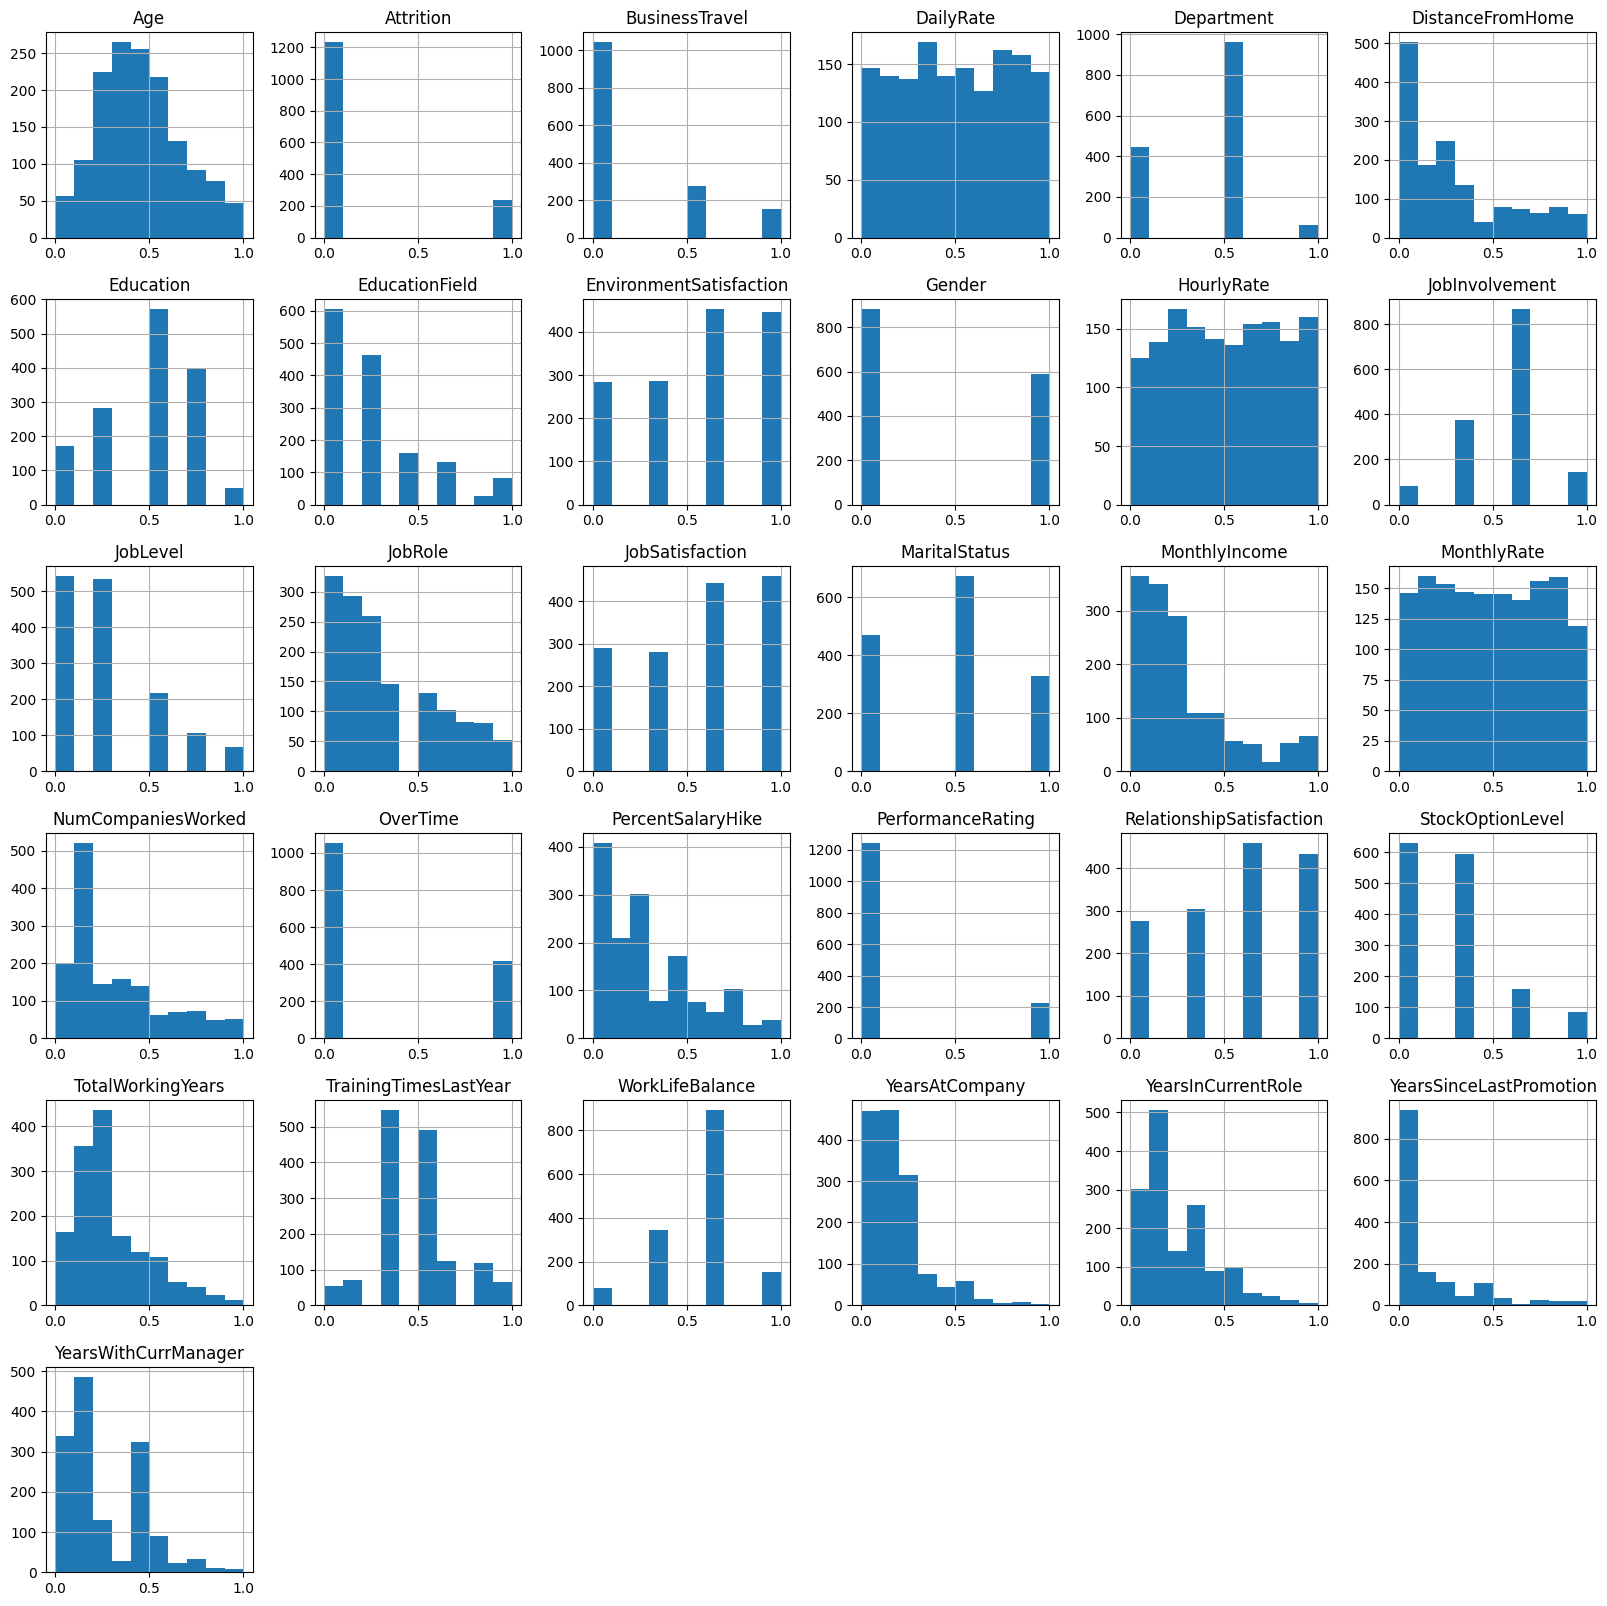

In [11]:
# histogram
df.hist(figsize=(20, 20))
plt.show()

In [12]:
# correlation to Attrition (target) in absolute value
corr['Attrition'].abs().sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
MaritalStatus               0.162070
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
Department                  0.063991
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
EducationField              0.051567
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
JobRole                     0.027930
MonthlyRate                 0.015170
P

In [13]:
# split
from sklearn.model_selection import train_test_split

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [14]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

# predict
y_pred = logisticRegression.predict(X_test)

In [15]:
# report (accuracy, precision, recall, f1-score) and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(f"Report:\n{classification_report(y_test, y_pred)}")
# confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted No', 'Predicted Yes'], index=[
                  'Actual No', 'Actual Yes'])
print(f"Confusion Matrix:\n{cm}")

Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       255
         1.0       0.82      0.23      0.36        39

    accuracy                           0.89       294
   macro avg       0.86      0.61      0.65       294
weighted avg       0.88      0.89      0.86       294

Confusion Matrix:
            Predicted No  Predicted Yes
Actual No            253              2
Actual Yes            30              9
